<a href="https://colab.research.google.com/github/QinmengLUAN/Projects_and_Pandas/blob/master/%E8%BD%AC%E8%BF%90%E4%BB%B7%E6%A0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 转运价格计算与比较


> by Moe 12/03/2021


*   该code可快速计算各公司价格，以晨曦国际快递转运举例
*   晨曦国际快递转运的性价比提升，在4.5kg后就变得十分微弱，即：货物达到4.5kg即可考虑转运。



In [89]:
import math
def cost(weight, ini_weight, ini_price, later_price):
  '''
  weight: 货物重量 (kg)
  ini_weight: 各个公司首重 （kg）
  ini_price： 首重单价（rmb/0.5kg）
  later_price: 后续单价（rmb/0.5kg）
  outputs:
  total: 总价（rmb）
  性价比：total/weights（rmb/kg）
  '''
  total, rate = 0, 0
  # 如果重量轻于首重
  if weight <= ini_weight:
    total, rate = ini_price, ini_price/weight
    return total, rate

  # 如果重量大于首重
  total += ini_price
  total += math.ceil((weight - ini_weight) * 2) * later_price

  rate = total / weight
  return total, rate

In [94]:
# A文龙-晨曦国际快递转运
# EMS 首单0.5kg - 128 rmb; 后续 0.5kg - 38 rmb

####################
# 输入下单信息
weight = 10 #货物重量kg
ini_weight = 0.5
ini_price = 128
later_price = 38
####################

total, rate = cost(weight, ini_weight, ini_price, later_price)
print("订单重", weight, "kg 时:")
print("你需要支付：", total, "rmb")
print("此单性价比伟：", rate, "rmb/kg")

订单重 10 kg 时:
你需要支付： 850 rmb
此单性价比伟： 85.0 rmb/kg


Text(0.5, 0, 'weight (kg)')

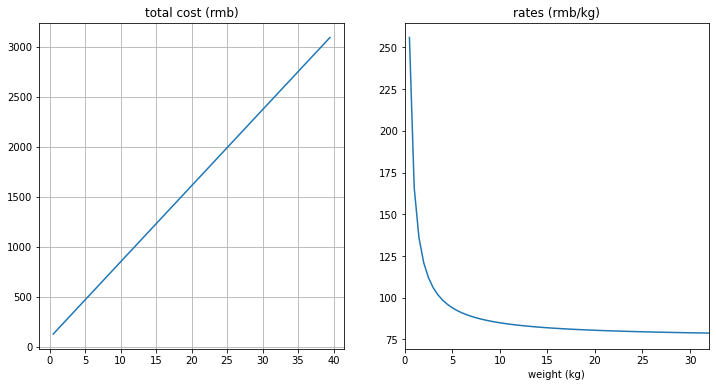

In [91]:
# 查看各个重量下的价格和性价比
####################
# 输入公司报价信息
ini_weight = 0.5
ini_price = 128
later_price = 38
####################
import numpy as np
weights = np.arange(0.5, 40, 0.5) # Change the range you wish to check here
totals, rates = [], []

for weight in weights:
  total, rate = cost(weight, ini_weight, ini_price, later_price)
  totals.append(total)
  rates.append(rate)

# Plot the total price and rates to compare
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,6))

ax1.plot(weights, totals, label='total cost (rmb)')
ax1.set_title('total cost (rmb)')
ax1.grid(True)

ax2.plot(weights, rates, label='raes (rmb/kg)')
ax2.set_title('rates (rmb/kg)')
plt.xlim([0,32])
plt.xlabel('weight (kg)')

## Calculate Elbow point

4.5


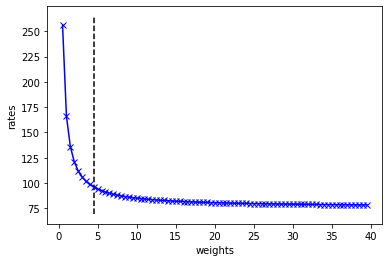

In [92]:
# !pip install --upgrade kneed
from kneed import KneeLocator
x, y = weights, rates
kn = KneeLocator(x, y, curve='convex', direction='decreasing')
print(kn.knee)

import matplotlib.pyplot as plt
plt.xlabel('weights')
plt.ylabel('rates')
plt.plot(x, y, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

Elbow point = 4.5 kg
> i.e. Adding more weights will not cause an obvious drop of the 性价比。

